# Newman Girvan

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import operator

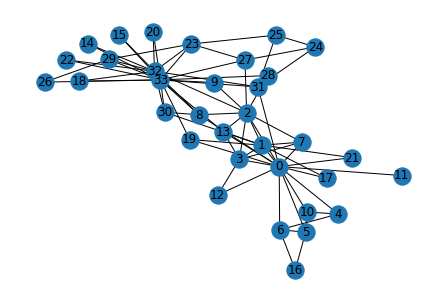

In [2]:
G = nx.karate_club_graph()
nx.draw(G,with_labels=True)

Premièrement attribution des poids sur les sommets, en partant d'un point précis.

In [2]:
def attrib_pds_som(G,sommet_debut):
#retourne le poids des points et la distance pour l'utiliser sur la fonction suivante.
    poids_sommet={}
    dist_sommet={}
    parcouru=[sommet_debut]
    #initialisation de poids des sommets à 0.
    for i in range (0,len(G.nodes())):
        poids_sommet[i]=0
        dist_sommet[i]=0

    #attribution du poids 1 au sommet de base ainsi qu'à ses voisins.
    poids_sommet[sommet_debut]=1
    a_parcourir=[]
    for i in G.neighbors(sommet_debut):
        poids_sommet[i]=1
        dist_sommet[i]=1
        parcouru.append(i)
        a_parcourir.append(i)

    #mise en place d'une boucle afin de parcourir tout les points.
    while len(parcouru)<len(G.nodes()):
        a_parcourir_bis=[]
        for sommet in a_parcourir:
            for i in G.neighbors(sommet):
                if i not in parcouru:
                    poids_sommet[i]=poids_sommet[sommet]
                    dist_sommet[i]=dist_sommet[sommet]+1
                    a_parcourir_bis.append(i)
                    parcouru.append(i)
                else:
                    if dist_sommet[i]==dist_sommet[sommet]+1:
                        poids_sommet[i]=poids_sommet[i]+1
        a_parcourir=[]
        a_parcourir=a_parcourir_bis
        
    return poids_sommet,dist_sommet


#attrib_pds_som(G,0)

Ensuite remontée afin de mettre des poids sur les arètes.

In [13]:
def poids_arete_som(G, sommet_debut):
    poids_arete={}
    poids_sommet,dist_sommet=attrib_pds_som(G,sommet_debut)

    #calcul de la distance la plus grande.
    maxi = None
    for k in dist_sommet:
        if dist_sommet[k]!=None:
            if maxi is None or dist_sommet[k] > maxi:
                maxi = dist_sommet[k]

    #Premièrement, on traite les points les plus loin du sommet de départ
    parcouru=[]
    for sommet,dist in dist_sommet.items():
        if dist==maxi:
            parcouru.append(sommet)
            for i in G.neighbors(sommet):
                poids_arete[i,sommet]=poids_sommet[i]/poids_sommet[sommet]
    
    for j in range(maxi-1,0,-1):
        for sommet,dist in dist_sommet.items():
            if dist == j:
                parcouru.append(sommet)
                voisins=[]
                for i in G.neighbors(sommet):
                    voisins.append(i)
                somme=0
                for k in voisins:
                    if k in parcouru and dist_sommet[k]!=dist_sommet[sommet]:
                        somme+=poids_arete[sommet,k]
                for k in voisins:
                    if k not in parcouru and dist_sommet[k]!=dist_sommet[sommet]:
                        poids_arete[k,sommet]=(1+somme)*(poids_sommet[k]/poids_sommet[sommet])
                    
    
    return poids_arete
            

({0: 1, 1: 1, 2: 1, 3: 2, 4: 1, 5: 3}, {0: 0, 1: 1, 2: 1, 3: 2, 4: 2, 5: 3})

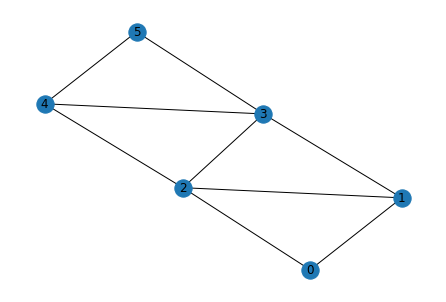

In [5]:
G_test = nx.Graph()

G_test.add_node(0)
G_test.add_node(1)
G_test.add_node(2)
G_test.add_node(3)
G_test.add_node(4)
G_test.add_node(5)

G_test.add_edge(0,1,weight=1)
G_test.add_edge(0,2,weight=1)
G_test.add_edge(1,2,weight=1)
G_test.add_edge(1,3,weight=1)
G_test.add_edge(2,4,weight=1)
G_test.add_edge(2,3,weight=1)
G_test.add_edge(3,4,weight=1)
G_test.add_edge(3,5,weight=1)
G_test.add_edge(4,5,weight=1)

nx.draw(G_test,with_labels=True)
attrib_pds_som(G_test,0)

In [6]:
poids_sommet,dist_sommet=attrib_pds_som(G_test,0)


poids_arete_som(G_test,3)


1 {(1, 0): 0.5, (2, 0): 0.5}
[0, 2, 3] 1
0.5
[0, 1, 4, 3] 2
0.5
[2, 3, 5] 4
0
[3, 4] 5
0


{(1, 0): 0.5, (2, 0): 0.5, (3, 1): 1.5, (3, 2): 1.5, (3, 4): 1.0, (3, 5): 1.0}

In [33]:
poids_arete={}
# il faut créer toute les aretes existante dans ce dictionnaire
for arete in G_test.edges():
    poids_arete[arete]=0

# on applique la fonction pour chaque sommet et on somme le poids des aretes
for sommet in G_test.nodes():
    poids=poids_arete_som(G_test, sommet)
    for arete1,poid in poids.items():
        if arete1[0]<arete1[1]:
            poids_arete[arete1]+=poid
        else:
            poids_arete[arete1[1],arete1[0]]+=poid

poids_max=0
arete_max=0
for ar,pds in poids_arete.items():
    if pds>poids_max:
        poids_max=pds
        arete_max=ar

print(poids_arete,'\n',arete_max,poids_max)

{(0, 1): 6.333333333333333, (0, 2): 6.666666666666666, (1, 2): 3.0, (1, 3): 6.833333333333333, (2, 4): 6.833333333333333, (2, 3): 4.833333333333333, (3, 4): 3.0, (3, 5): 6.666666666666666, (4, 5): 6.333333333333333} 
 (1, 3) 6.833333333333333


In [10]:
l=[]
for i in G_test.edges():
    l.append(i)
print (l)

[(0, 1), (0, 2), (1, 2), (1, 3), (2, 4), (2, 3), (3, 4), (3, 5), (4, 5)]
